In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [101]:
def simple_plot(x, y):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.grid()

### 1. Linear Reservoir with Zero initial storage. Constant endless inflow. Analytical Solution.


In [102]:
def simple_linear_reservoir_analytical(A, inflow, K, time_steps_arr):
    '''
    S - initial storage volume (m3),
    A - area (m2),
    inflow - for instance precipitation, (mm),
    K - constant of reservoir (sec),
    time_step (sec).
    '''
    I = inflow * A
    steps_num = len(time_steps_arr)
    Q_outflow = np.empty(steps_num)
    for i in range(steps_num):
        t = time_steps_arr[i]
        Q_t = I * (1 - exp(-t/K))
        Q_outflow[i] = Q_t
    return Q_outflow

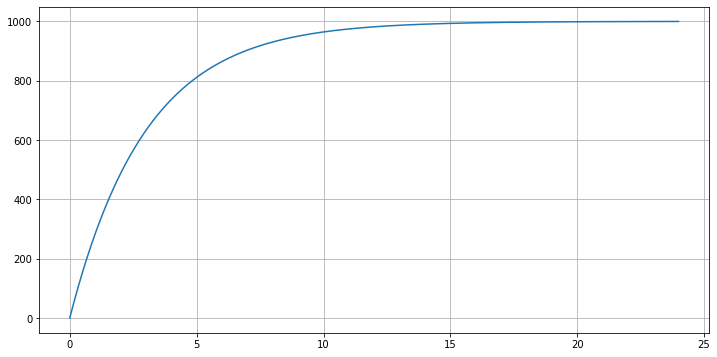

In [103]:
S = 0 # m3, empty reservoir
A = 1000 # m2
K = 3
time_steps_arr = np.arange(0.0, 24.0, 0.01) # generating output time_steps
inflow = 1 # precipitation rate, mm/hour
inlfow = inflow / 1000.0 # conversion to m/hour

Q_outflow = simple_linear_reservoir_analytical(A, inflow, K, time_steps_arr)
simple_plot(time_steps_arr, Q_outflow)

### 2. Linear Reservoir with Zero initial storage. Constant inflow till some point in time. Analytical Solution.

In [104]:
def linear_reservoir_analytical(A, inflow, K, time_steps_arr, tau):
    '''
    S - initial storage volume (m3),
    A - area (m2),
    inflow - for instance precipitation, (mm),
    K - constant of reservoir (sec),
    time_step (sec).
    '''
    steps_num = len(time_steps_arr)
    Q_outflow = np.empty(steps_num)
    for i in range(steps_num):
        I = inflow[i] * A
        t = time_steps_arr[i]
        if I > 0:
            Q_t = I * (1 - exp(-t/K))
        else:
            Q_t = Q_outflow[i-1] * exp(-tau/K)

        Q_outflow[i] = Q_t
    return Q_outflow

In [117]:
S = 0 # m3, empty reservoir
A = 1000 # m2
tau = 0.01
time_steps_arr = np.arange(0.0, 24.0, tau) # generating output time_steps

inflow = np.empty(len(time_steps_arr)) # precipitation rate, mm/hour
inflow[0:1200] = 1.0
inflow[1200:] = 0.0
inlfow = inflow / 1000.0 # conversion to m/hour
K = 3

Q_outflow = linear_reservoir_analytical(A, inflow, K, time_steps_arr, tau)
simple_plot(time_steps_arr, Q_outflow)

### 3. General analytical solution for Linear Reservoir.

In [106]:
def general_linear_reservoir_analytical(A, S_0, inflow, K, tau):
    steps_num = len(inflow)
    S = np.empty(steps_num)
    Q = np.empty(steps_num)
    for i in range(steps_num):
        I = inflow[i] * A
        S_t = S_0 * exp(-tau/K) + K * I * (1-exp(-tau/K))
        Q_t = (S_0 + I - S_t)/tau
        S[i] = S_t
        Q[i] = Q_t
        S_0 = S_t
    return S, Q

In [113]:
prec_file = "Precip.dat"
prec_df = pd.read_table(prec_file)
prec_arr = prec_df.values

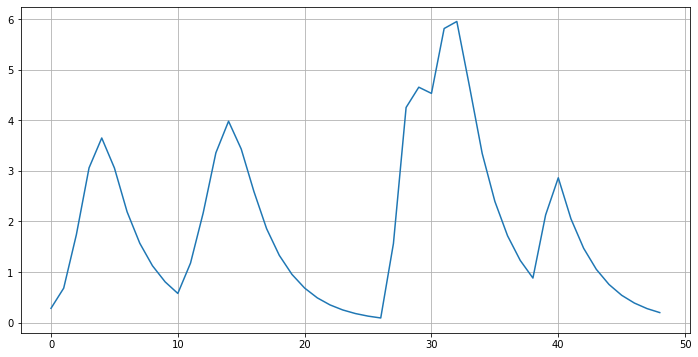

In [114]:
S_0 = 1 # m3
A = 1000 # m2
tau = 1 # hour

steps_num = len(prec_arr)
prec_arr = prec_arr / 1000.0 # conversion to m/hour
K = 3

S, Q_outflow = general_linear_reservoir_analytical(A, S_0, prec_arr, K, tau)

time_steps_arr = np.arange(steps_num)
simple_plot(range(len(inflow)), Q_outflow)
# simple_plot(S)

In [116]:
balance_analytical = (np.sum(Q_outflow)*tau + S[-1])/(np.sum(prec_arr)*A + S_0)
print(balance_analytical)

1.0


In [110]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

K_samples = [0.2, 0.5, 0.7, 1.0, 1.2, 1.5, 2.0, 3.0, 4.0]

for K in K_samples:
    S, Q_outflow = general_linear_reservoir_analytical(A, S_0, inflow, K, tau)
    ax.plot(Q_outflow, label = str(K))   
    
legend = ax.legend()
ax.grid()